# Importing the datset

In [18]:
import pandas as pd
import numpy as np

In [19]:
def pds()-> None:
    pd.options.display.max_colwidth=500
    pd.options.display.max_columns=1000
    
pds()

In [20]:
df = pd.read_csv(r'C:\Users\ACER\Downloads\ipl2017.csv')

In [21]:
df.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


In [22]:
df.info

<bound method DataFrame.info of        mid        date                                      venue  \
0        1  2008-04-18                      M Chinnaswamy Stadium   
1        1  2008-04-18                      M Chinnaswamy Stadium   
2        1  2008-04-18                      M Chinnaswamy Stadium   
3        1  2008-04-18                      M Chinnaswamy Stadium   
4        1  2008-04-18                      M Chinnaswamy Stadium   
...    ...         ...                                        ...   
76009  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76010  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76011  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76012  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76013  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   

                    bat_team                    bowl_team      batsman  \
0      Kolkata Knight Riders  Royal Challengers Bangalore   SC Ga

# Handling missing values if any(no missing value)

In [23]:
df.isnull().any()

mid               False
date              False
venue             False
bat_team          False
bowl_team         False
batsman           False
bowler            False
runs              False
wickets           False
overs             False
runs_last_5       False
wickets_last_5    False
striker           False
non-striker       False
total             False
dtype: bool

In [24]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

# Removing unnecessary columns

In [25]:
final=df.drop(['date','mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'], axis=1)

In [26]:
final.columns

Index(['bat_team', 'bowl_team', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total'],
      dtype='object')

In [27]:
final.index

RangeIndex(start=0, stop=76014, step=1)

In [28]:
final['bat_team'].unique() #supergiants repeated two times 

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [29]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad','Deccan Chargers','Kochi Tuskers Kerala', 'Pune Warriors','Rising Pune Supergiants', 'Gujarat Lions']

In [30]:
print('Before removing inconsistent teams: {}'.format(final.shape))
new_df= final[(final['bat_team'].isin(consistent_teams)) & (final['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(new_df.shape))

Before removing inconsistent teams: (76014, 8)
After removing inconsistent teams: (74058, 8)


In [31]:
new_df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

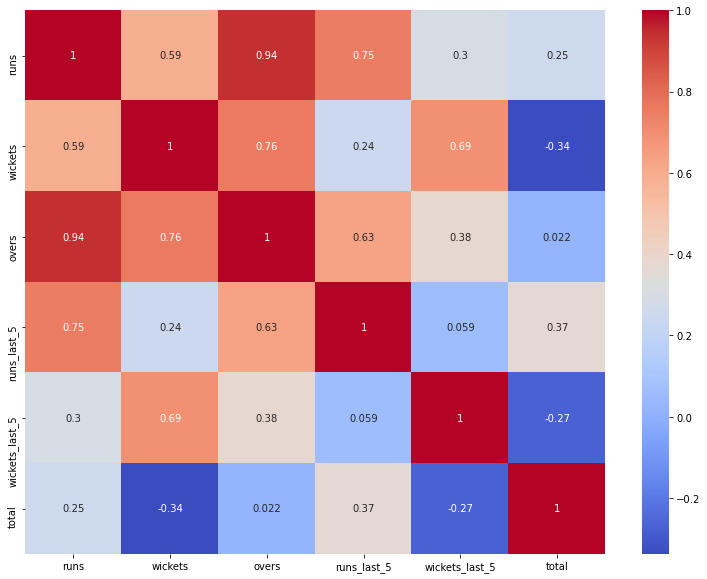

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = new_df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='coolwarm')

# One-Hot encoding

In [33]:
# Converting categorical features using OneHotEncoding method
encod_df = pd.get_dummies(data=new_df, columns=['bat_team', 'bowl_team'])
encod_df.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total',
       'bat_team_Chennai Super Kings', 'bat_team_Deccan Chargers',
       'bat_team_Delhi Daredevils', 'bat_team_Gujarat Lions',
       'bat_team_Kings XI Punjab', 'bat_team_Kochi Tuskers Kerala',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Pune Warriors', 'bat_team_Rajasthan Royals',
       'bat_team_Rising Pune Supergiants',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Deccan Chargers',
       'bowl_team_Delhi Daredevils', 'bowl_team_Gujarat Lions',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kochi Tuskers Kerala',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Pune Warriors', 'bowl_team_Rajasthan Royals',
       'bowl_team_Rising Pune Supergiants',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
    

In [34]:
encod_df

,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Deccan Chargers,bat_team_Delhi Daredevils,bat_team_Gujarat Lions,bat_team_Kings XI Punjab,bat_team_Kochi Tuskers Kerala,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Pune Warriors,bat_team_Rajasthan Royals,bat_team_Rising Pune Supergiants,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Deccan Chargers,bowl_team_Delhi Daredevils,bowl_team_Gujarat Lions,bowl_team_Kings XI Punjab,bowl_team_Kochi Tuskers Kerala,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Pune Warriors,bowl_team_Rajasthan Royals,bowl_team_Rising Pune Supergiants,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,1,0,0.1,1,0,222,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0.2,1,0,222,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,0,0.2,2,0,222,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,0,0.3,2,0,222,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,0,0.4,2,0,222,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,106,9,18.1,29,4,107,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
75885,107,9,18.2,29,4,107,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
75886,107,9,18.3,28,4,107,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
75887,107,9,18.4,24,4,107,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [35]:
X=encod_df.drop(['total'],axis=1)
print('Shape of X : ',X.shape)
print('Type of X : ',type(X))

Shape of X :  (74058, 31)
Type of X :  <class 'pandas.core.frame.DataFrame'>


In [36]:
y = encod_df['total']
print('Shape of y : ',y.shape)
print('Type of y : ',type(y))

Shape of y :  (74058,)
Type of y :  <class 'pandas.core.series.Series'>


# Feature scaling

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()

In [41]:
X_train=scaler.fit_transform(X_train)

In [42]:
X_test=scaler.transform(X_test)

# Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
model=RandomForestRegressor()

In [45]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [46]:
model.score(X_test,y_test)

0.8160773356860361

In [47]:
model.score(X_train,y_train)

0.9594782427305462

In [48]:
y_pred = model.predict(X_test)

In [49]:
# Model Evaluation

from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 6.776096445405984
MSE 154.7390023364977
RMSE 12.43941326335361


# New Dataset Prediction

In [50]:
x_new={'runs':[6],'wickets':[3],'overs':[2.5],'runs_last_5':[6],'wickets_last_5':[3],'bat_team_Deccan Charges':[0],'bat_team_Chennai Super Kings':[0],'bat_team_Delhi Daredevils':[0],'bat_team_Gujarat Lions':[0], 'bat_team_Kings XI Punjab':[0],'bat_team_Kochi Tuskers Kerala':[0], 'bat_team_Kolkata Knight Riders':[0],
       'bat_team_Mumbai Indians':[1], 'bat_team_Pune Warriors':[0],
       'bat_team_Rajasthan Royals':[0],
       'bat_team_Rising Pune Supergiants':[0],
       'bat_team_Royal Challengers Bangalore':[0], 'bat_team_Sunrisers Hyderabad':[0],
       'bowl_team_Deccan Chargers':[0],'bowl_team_Chennai Super Kings':[0], 'bowl_team_Delhi Daredevils':[0],
       'bowl_team_Gujarat Lions':[0], 'bowl_team_Kings XI Punjab':[0],
       'bowl_team_Kochi Tuskers Kerala':[0], 'bowl_team_Kolkata Knight Riders':[0],
       'bowl_team_Mumbai Indians':[0], 'bowl_team_Pune Warriors':[0],
       'bowl_team_Rajasthan Royals':[0], 
       'bowl_team_Rising Pune Supergiants':[0],
       'bowl_team_Royal Challengers Bangalore':[1],
       'bowl_team_Sunrisers Hyderabad':[0]}

In [51]:
x_new

{'runs': [6],
 'wickets': [3],
 'overs': [2.5],
 'runs_last_5': [6],
 'wickets_last_5': [3],
 'bat_team_Deccan Charges': [0],
 'bat_team_Chennai Super Kings': [0],
 'bat_team_Delhi Daredevils': [0],
 'bat_team_Gujarat Lions': [0],
 'bat_team_Kings XI Punjab': [0],
 'bat_team_Kochi Tuskers Kerala': [0],
 'bat_team_Kolkata Knight Riders': [0],
 'bat_team_Mumbai Indians': [1],
 'bat_team_Pune Warriors': [0],
 'bat_team_Rajasthan Royals': [0],
 'bat_team_Rising Pune Supergiants': [0],
 'bat_team_Royal Challengers Bangalore': [0],
 'bat_team_Sunrisers Hyderabad': [0],
 'bowl_team_Deccan Chargers': [0],
 'bowl_team_Chennai Super Kings': [0],
 'bowl_team_Delhi Daredevils': [0],
 'bowl_team_Gujarat Lions': [0],
 'bowl_team_Kings XI Punjab': [0],
 'bowl_team_Kochi Tuskers Kerala': [0],
 'bowl_team_Kolkata Knight Riders': [0],
 'bowl_team_Mumbai Indians': [0],
 'bowl_team_Pune Warriors': [0],
 'bowl_team_Rajasthan Royals': [0],
 'bowl_team_Rising Pune Supergiants': [0],
 'bowl_team_Royal Challen

In [52]:
data = pd.DataFrame(x_new)

In [53]:
data

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Deccan Charges,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Gujarat Lions,bat_team_Kings XI Punjab,bat_team_Kochi Tuskers Kerala,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Pune Warriors,bat_team_Rajasthan Royals,bat_team_Rising Pune Supergiants,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Deccan Chargers,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Gujarat Lions,bowl_team_Kings XI Punjab,bowl_team_Kochi Tuskers Kerala,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Pune Warriors,bowl_team_Rajasthan Royals,bowl_team_Rising Pune Supergiants,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,6,3,2.5,6,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
model.predict(data)

array([242.55])